In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Convert image to grayscale

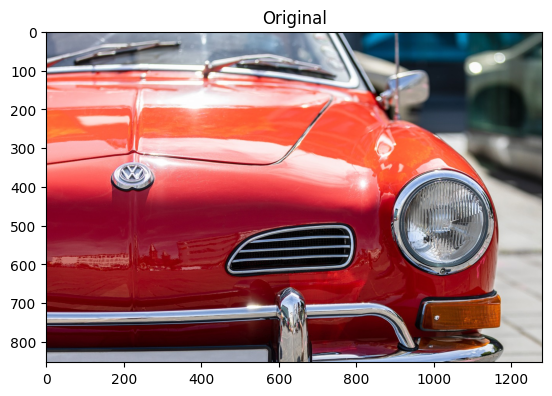

In [3]:
image = cv2.imread('car.jpg')
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.title("Original")
plt.imshow(img_rgb)

In [4]:
#Threshold the image to create a binary mask for markers
_, binary_mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#Perform distance transformation to create markers
distance_transform = cv2.distanceTransform(binary_mask, cv2.DIST_L2, 5)

#Create markers from the distance transformation
_, markers = cv2.connectedComponents(np.uint8(distance_transform))

Perform the watershed algorithm

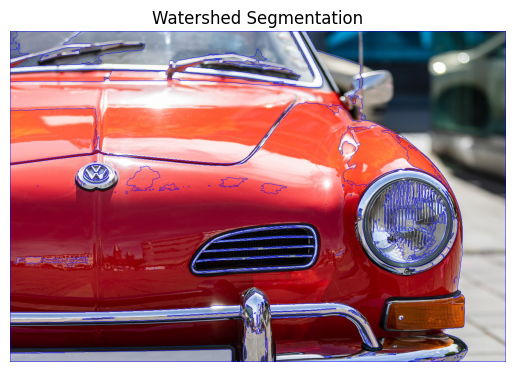

In [8]:
cv2.watershed(image, markers)
# Color the boundaries of the regions with blue color
image[markers == -1] = [255, 0, 0]

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()